#**download data directly from Kaggle**

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 70% 14.0M/20.1M [00:00<00:00, 70.2MB/s]
100% 20.1M/20.1M [00:00<00:00, 72.2MB/s]


#**Unzip**


In [3]:
!unzip udea*.zip > /dev/null

In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



In [5]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [6]:
data = z.copy()

#Fase de preprocesado


En esta sección de códigos que siguen se van a realizar las distintas transformaciones necesarias para las variables de interés que se utilizarán en el modelo predictivo, todo con el objetivo de poder trabajar, medirlas y estudiarlas para permitirnos acercarnos a predicciones con un buen porcentaje de acierto en nuestro modelo.

##Cleaning VALORMATRICULA column



 Este proceso convierte los rangos de matrícula en valores numéricos usando un diccionario, lo que facilita el análisis posterior. Primero, se mapean los rangos textuales de matrícula a valores promedio definidos. Luego para los valores nulos, se calcula la media y desviación estándar para generar datos simulados que siguen una distribución similar. Finalmente, estos valores generados reemplazan los datos faltantes en la columna, dejando una columna de matrícula completa y coherente para análisis.

In [7]:
def cleaning_val_matricula(data):
    vals_matricula = {
        'Entre 5.5 millones y menos de 7 millones': 6.25,
        'Entre 2.5 millones y menos de 4 millones': 3.25,
        'Entre 4 millones y menos de 5.5 millones': 4.75,
        'Más de 7 millones': 7.0,
        'Entre 1 millón y menos de 2.5 millones': 1.75,
        'Entre 500 mil y menos de 1 millón': 0.75,
        'Menos de 500 mil': 0.25,
        'No pagó matrícula': 0,
    }
    data['ESTU_VALORMATRICULAUNIVERSIDAD'] = data['ESTU_VALORMATRICULAUNIVERSIDAD'].map(vals_matricula)

    # Se calcula la media y desviación estándar
    mean = data['ESTU_VALORMATRICULAUNIVERSIDAD'].mean()
    std = data['ESTU_VALORMATRICULAUNIVERSIDAD'].std()

    #tamaño de la muestra (valores nulos)
    sample = np.random.normal(mean, std, data['ESTU_VALORMATRICULAUNIVERSIDAD'].isna().sum())
    data.loc[data['ESTU_VALORMATRICULAUNIVERSIDAD'].isna(), 'ESTU_VALORMATRICULAUNIVERSIDAD'] = sample
    has_nan = data['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().any()
    print(has_nan)  # True if there are NaNs, otherwise False

In [8]:
cleaning_val_matricula(data)
data.head()

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# Cleaning FAMI_TIENEINTERNET column


Simplemente mapeamos el dataset con tres reglas para asignar valores númericos a esta columna

In [9]:
def cleaning_internet(data):
    data['FAMI_TIENEINTERNET'] = data['FAMI_TIENEINTERNET'].fillna('Sin Información')
    data['FAMI_TIENEINTERNET'] = data['FAMI_TIENEINTERNET'].map({
        'Si': 1,
        'No': 0,
        'Sin Información': -1
    })
    has_nan = data['FAMI_TIENEINTERNET'].isnull().any()
    print(has_nan)  # True if there are NaNs, otherwise False


In [10]:
cleaning_internet(data)
data.head(10)

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,1,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,Primaria completa,No,medio-bajo
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,7.00,Menos de 10 horas,Estrato 5,1,Educación profesional completa,Secundaria (Bachillerato) completa,No,medio-alto
6,47159,20183,INGENIERIA MECANICA,HUILA,3.25,Entre 21 y 30 horas,Estrato 2,1,Educación profesional incompleta,Técnica o tecnológica completa,Si,alto
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.75,Entre 11 y 20 horas,Estrato 2,1,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-bajo
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,6.25,Menos de 10 horas,Estrato 1,1,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,medio-bajo
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,3.25,Más de 30 horas,Estrato 5,1,Postgrado,Postgrado,Si,alto


#Cleaning rendimiento global


Este código convierte los niveles de rendimiento de texto en valores numéricos para facilitar el análisis. Mediante un diccionario, mapea los valores de "bajo", "medio-bajo", "medio-alto" y "alto" a los números 0, 1, 2 y 3, respectivamente. Luego, reemplaza en la columna "RENDIMIENTO_GLOBAL" los valores de texto originales con estos valores numéricos.

In [11]:
def cleaning_rendimiento(data):
  values = {"bajo":0,"medio-bajo":1, "medio-alto":2, "alto":3 }
  data["RENDIMIENTO_GLOBAL"] = data["RENDIMIENTO_GLOBAL"].map(values)
  has_nan = data['RENDIMIENTO_GLOBAL'].isnull().any()
  print(has_nan)  # True if there are NaNs, otherwise False

In [12]:
cleaning_rendimiento(data)
data.head()

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,1,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,Primaria completa,No,1


# Cleaning FAMI_EDUCACIONPADRE column

Primero, rellena valores nulos con “Sin Información” y asigna -1 a categorías como “No Aplica”, “Sin Información” y “No sabe” para indicar la ausencia de datos. Luego, utiliza un orden específico para los niveles educativos y aplica OrdinalEncoder para transformar estos niveles en valores numéricos según el orden predefinido, asegurando que sólo se codifiquen las filas con información válida.

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
def cleaning_padre(data):
    data['FAMI_EDUCACIONPADRE'] = data['FAMI_EDUCACIONPADRE'].fillna('Sin Información')
    data['FAMI_EDUCACIONPADRE'] = data['FAMI_EDUCACIONPADRE'].replace({
        'No Aplica': -1, 'Sin Información': -1, 'No sabe': -1
    })
    options = ['Ninguno', 'Primaria incompleta', 'Primaria completa',
              'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa',
              'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa',
              'Educación profesional incompleta', 'Educación profesional completa',
              'Postgrado']
    mask = data['FAMI_EDUCACIONPADRE'] != -1
    encoder = OrdinalEncoder(categories=[options])
    data.loc[mask, 'FAMI_EDUCACIONPADRE'] = encoder.fit_transform(data.loc[mask, ['FAMI_EDUCACIONPADRE']])
    data['FAMI_EDUCACIONPADRE'] = data['FAMI_EDUCACIONPADRE'].astype(int)
    has_nan = data['FAMI_EDUCACIONPADRE'].isnull().any()
    print(has_nan)  # True if there are NaNs, otherwise False

In [14]:
cleaning_padre(data)
data.head()

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,1,5,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,0,6,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,1,4,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,1,-1,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,1,2,Primaria completa,No,1


#cleaning FAMI_EDUCACIONMADRE

misma limpieza anterior pero para la madre

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
def cleaning_madre(data):
    data['FAMI_EDUCACIONMADRE'] = data['FAMI_EDUCACIONMADRE'].fillna('Sin Información')
    data['FAMI_EDUCACIONMADRE'] = data['FAMI_EDUCACIONMADRE'].replace({
        'No Aplica': -1, 'Sin Información': -1, 'No sabe': -1
    })
    options = ['Ninguno', 'Primaria incompleta', 'Primaria completa',
              'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa',
              'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa',
              'Educación profesional incompleta', 'Educación profesional completa',
              'Postgrado']
    mask = data['FAMI_EDUCACIONMADRE'] != -1
    encoder = OrdinalEncoder(categories=[options])
    data.loc[mask, 'FAMI_EDUCACIONMADRE'] = encoder.fit_transform(data.loc[mask, ['FAMI_EDUCACIONMADRE']])
    data['FAMI_EDUCACIONMADRE'] = data['FAMI_EDUCACIONMADRE'].astype(int)
    has_nan = data['FAMI_EDUCACIONMADRE'].isnull().any()
    print(has_nan)  # True if there are NaNs, otherwise False

In [16]:
cleaning_madre(data)
data.head()

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,1,5,9,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,0,6,5,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,1,4,4,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,1,-1,4,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,1,2,2,No,1


#ESTU_PRGM_ACADEMICO

Este código agrupa programas académicos en categorías utilizando aprendizaje automático. Primero, convierte los nombres de los programas en representaciones numéricas (embeddings) mediante el modelo SentenceTransformer. Luego, aplica el algoritmo de K-Means para crear grupos o categorías de programas académicos, donde cada grupo representa una categoría temática.

In [17]:
pip install sentence-transformers scikit-learn


In [18]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

def cleaning_programa(data):
    # Lista de programs académicos
    programs = data['ESTU_PRGM_ACADEMICO'].unique()

    # Cargar el modelo de embeddings
    model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

    # Generar embeddings para cada programa académico
    embeddings = model.encode(programs)

    # Elegir el número de clusters
    num_clusters = 15

    # Aplicar K-Means para agrupar
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans.fit_predict(embeddings)

    # Crear un diccionario de mapeo de programs a categorías (como números enteros)
    programa_a_categoria = {programa: label + 1 for programa, label in zip(programs, labels)}

    # Reemplazar los nombres de programs en el DataFrame por sus categorías numéricas
    data['ESTU_PRGM_ACADEMICO'] = data['ESTU_PRGM_ACADEMICO'].map(programa_a_categoria)
    has_nan = data['ESTU_PRGM_ACADEMICO'].isnull().any()
    print(has_nan)  # True if there are NaNs, otherwise False


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [19]:
cleaning_programa(data)
data.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,5,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,1,5,9,No,2
1,645256,20212,5,ATLANTICO,3.25,0,Estrato 3,0,6,5,No,0
2,308367,20203,1,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,1,4,4,No,0
3,470353,20195,10,SANTANDER,4.75,0,Estrato 4,1,-1,4,No,3
4,989032,20212,5,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,1,2,2,No,1


In [ ]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,5,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,1,5,9,No,2
1,645256,20212,5,ATLANTICO,3.25,0,Estrato 3,0,6,5,No,0
2,308367,20203,1,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,1,4,4,No,0
3,470353,20195,10,SANTANDER,4.75,0,Estrato 4,1,-1,4,No,3
4,989032,20212,5,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,1,2,2,No,1


#ESTU_HORASSEMANATRABAJA

In [20]:
import pandas as pd
import numpy as np

def cleaning_horas(data):
    # Mapeo de rangos a valores numéricos aproximados
    rango_a_horas = {
        'Menos de 10 horas': 5,        # Promedio del rango (0-10 horas)
        'Entre 11 y 20 horas': 15,     # Promedio del rango (11-20 horas)
        'Entre 21 y 30 horas': 25,     # Promedio del rango (21-30 horas)
        'Más de 30 horas': 35,         # Se puede usar un promedio o un valor base
        '0': 0                         # Indicador de que no trabaja
    }
    print(data['ESTU_HORASSEMANATRABAJA'].unique())
    # Reemplazar los valores con el mapeo definido
    data['ESTU_HORASSEMANATRABAJA'] = data['ESTU_HORASSEMANATRABAJA'].replace(rango_a_horas)

    # Convertir la columna a numérico
    data['ESTU_HORASSEMANATRABAJA'] = pd.to_numeric(data['ESTU_HORASSEMANATRABAJA'], errors='coerce')

    # Imputar valores NaN usando una distribución normal basada en los datos existentes (sin contar el 0)
    mean = data.loc[data['ESTU_HORASSEMANATRABAJA'] > 0, 'ESTU_HORASSEMANATRABAJA'].mean()
    std = data.loc[data['ESTU_HORASSEMANATRABAJA'] > 0, 'ESTU_HORASSEMANATRABAJA'].std()
    num_nan = data['ESTU_HORASSEMANATRABAJA'].isna().sum()

    # Generar valores aleatorios solo para los NaN, manteniendo los '0' como "no trabaja"
    data.loc[data['ESTU_HORASSEMANATRABAJA'].isna(), 'ESTU_HORASSEMANATRABAJA'] = np.random.normal(mean, std, num_nan)

    print(data['ESTU_HORASSEMANATRABAJA'].unique())  # Para verificar los resultados
    has_nan = data['ESTU_HORASSEMANATRABAJA'].isnull().any()
    print(has_nan)  # True if there are NaNs, otherwise False



In [21]:
cleaning_horas(data)
data.head()

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' nan]
[ 5.          0.         35.         ... 14.85985195 49.00795678
 31.20670289]
False


<ipython-input-20-5cc7fc740a4d>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ESTU_HORASSEMANATRABAJA'] = data['ESTU_HORASSEMANATRABAJA'].replace(rango_a_horas)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,5,BOGOTÁ,6.25,5.0,Estrato 3,1,5,9,No,2
1,645256,20212,5,ATLANTICO,3.25,0.0,Estrato 3,0,6,5,No,0
2,308367,20203,1,BOGOTÁ,3.25,35.0,Estrato 3,1,4,4,No,0
3,470353,20195,10,SANTANDER,4.75,0.0,Estrato 4,1,-1,4,No,3
4,989032,20212,5,ANTIOQUIA,3.25,25.0,Estrato 3,1,2,2,No,1


## Cleaning de ESTU_PRGM_DEPARTAMENTO

In [22]:
from sklearn.preprocessing import LabelEncoder
def department_cleaning(data):
  # Crear un LabelEncoder
  le = LabelEncoder()
  # Ajustar y transformar la columna `ESTU_PRGM_DEPARTAMENTO`
  data['ESTU_PRGM_DEPARTAMENTO'] = le.fit_transform(data['ESTU_PRGM_DEPARTAMENTO'])
  has_nan = data['ESTU_PRGM_DEPARTAMENTO'].isnull().any()
  print(has_nan)  # True if there are NaNs, otherwise False

In [23]:
department_cleaning(data)
data.head()

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,5,4,6.25,5.0,Estrato 3,1,5,9,No,2
1,645256,20212,5,3,3.25,0.0,Estrato 3,0,6,5,No,0
2,308367,20203,1,4,3.25,35.0,Estrato 3,1,4,4,No,0
3,470353,20195,10,26,4.75,0.0,Estrato 4,1,-1,4,No,3
4,989032,20212,5,1,3.25,25.0,Estrato 3,1,2,2,No,1


##Cleaning FAMI_ESTRATOVIVIENDA

In [24]:
def cleaning_estrato(data):
  # data['FAMI_ESTRATOVIVIENDA'] = data['FAMI_ESTRATOVIVIENDA'].fillna(-1)
  maping ={
      'Estrato 1': 1,
      'Estrato 2': 2,
      'Estrato 3': 3,
      'Estrato 4': 4,
      'Estrato 5': 5,
      'Estrato 6': 6,
      'Sin Estrato': -1
  }
  data['FAMI_ESTRATOVIVIENDA'] = data['FAMI_ESTRATOVIVIENDA'].map(maping)
  data['FAMI_ESTRATOVIVIENDA'] = data['FAMI_ESTRATOVIVIENDA'].fillna(-1)
  has_nan = data['FAMI_ESTRATOVIVIENDA'].isnull().any()
  print(has_nan)  # True if there are NaNs, otherwise False

In [25]:
cleaning_estrato(data)
data.head()

False


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,5,4,6.25,5.0,3.0,1,5,9,No,2
1,645256,20212,5,3,3.25,0.0,3.0,0,6,5,No,0
2,308367,20203,1,4,3.25,35.0,3.0,1,4,4,No,0
3,470353,20195,10,26,4.75,0.0,4.0,1,-1,4,No,3
4,989032,20212,5,1,3.25,25.0,3.0,1,2,2,No,1


## Cleaning ESTU_PAGOMATRICULAPROPIO

In [26]:
def cleaning_pagomatriculapropio(data):
    # Fill NaNs with -1 first
    data['ESTU_PAGOMATRICULAPROPIO'] = data['ESTU_PAGOMATRICULAPROPIO'].fillna(-1)

    # Map 'Si' to 1 and 'No' to 0
    data['ESTU_PAGOMATRICULAPROPIO'] = data['ESTU_PAGOMATRICULAPROPIO'].map({
        'Si': 1,
        'No': 0,
    }).fillna(-1).astype(int)  # Convert any remaining NaNs to -1

    print(data['ESTU_PAGOMATRICULAPROPIO'].unique())

In [27]:
cleaning_pagomatriculapropio(data)
data.head()

[ 0  1 -1]


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,5,4,6.25,5.0,3.0,1,5,9,0,2
1,645256,20212,5,3,3.25,0.0,3.0,0,6,5,0,0
2,308367,20203,1,4,3.25,35.0,3.0,1,4,4,0,0
3,470353,20195,10,26,4.75,0.0,4.0,1,-1,4,0,3
4,989032,20212,5,1,3.25,25.0,3.0,1,2,2,0,1


# Visualización de Relaciones de variables con la objetivo

## Valor matricula X Rendimiento Global

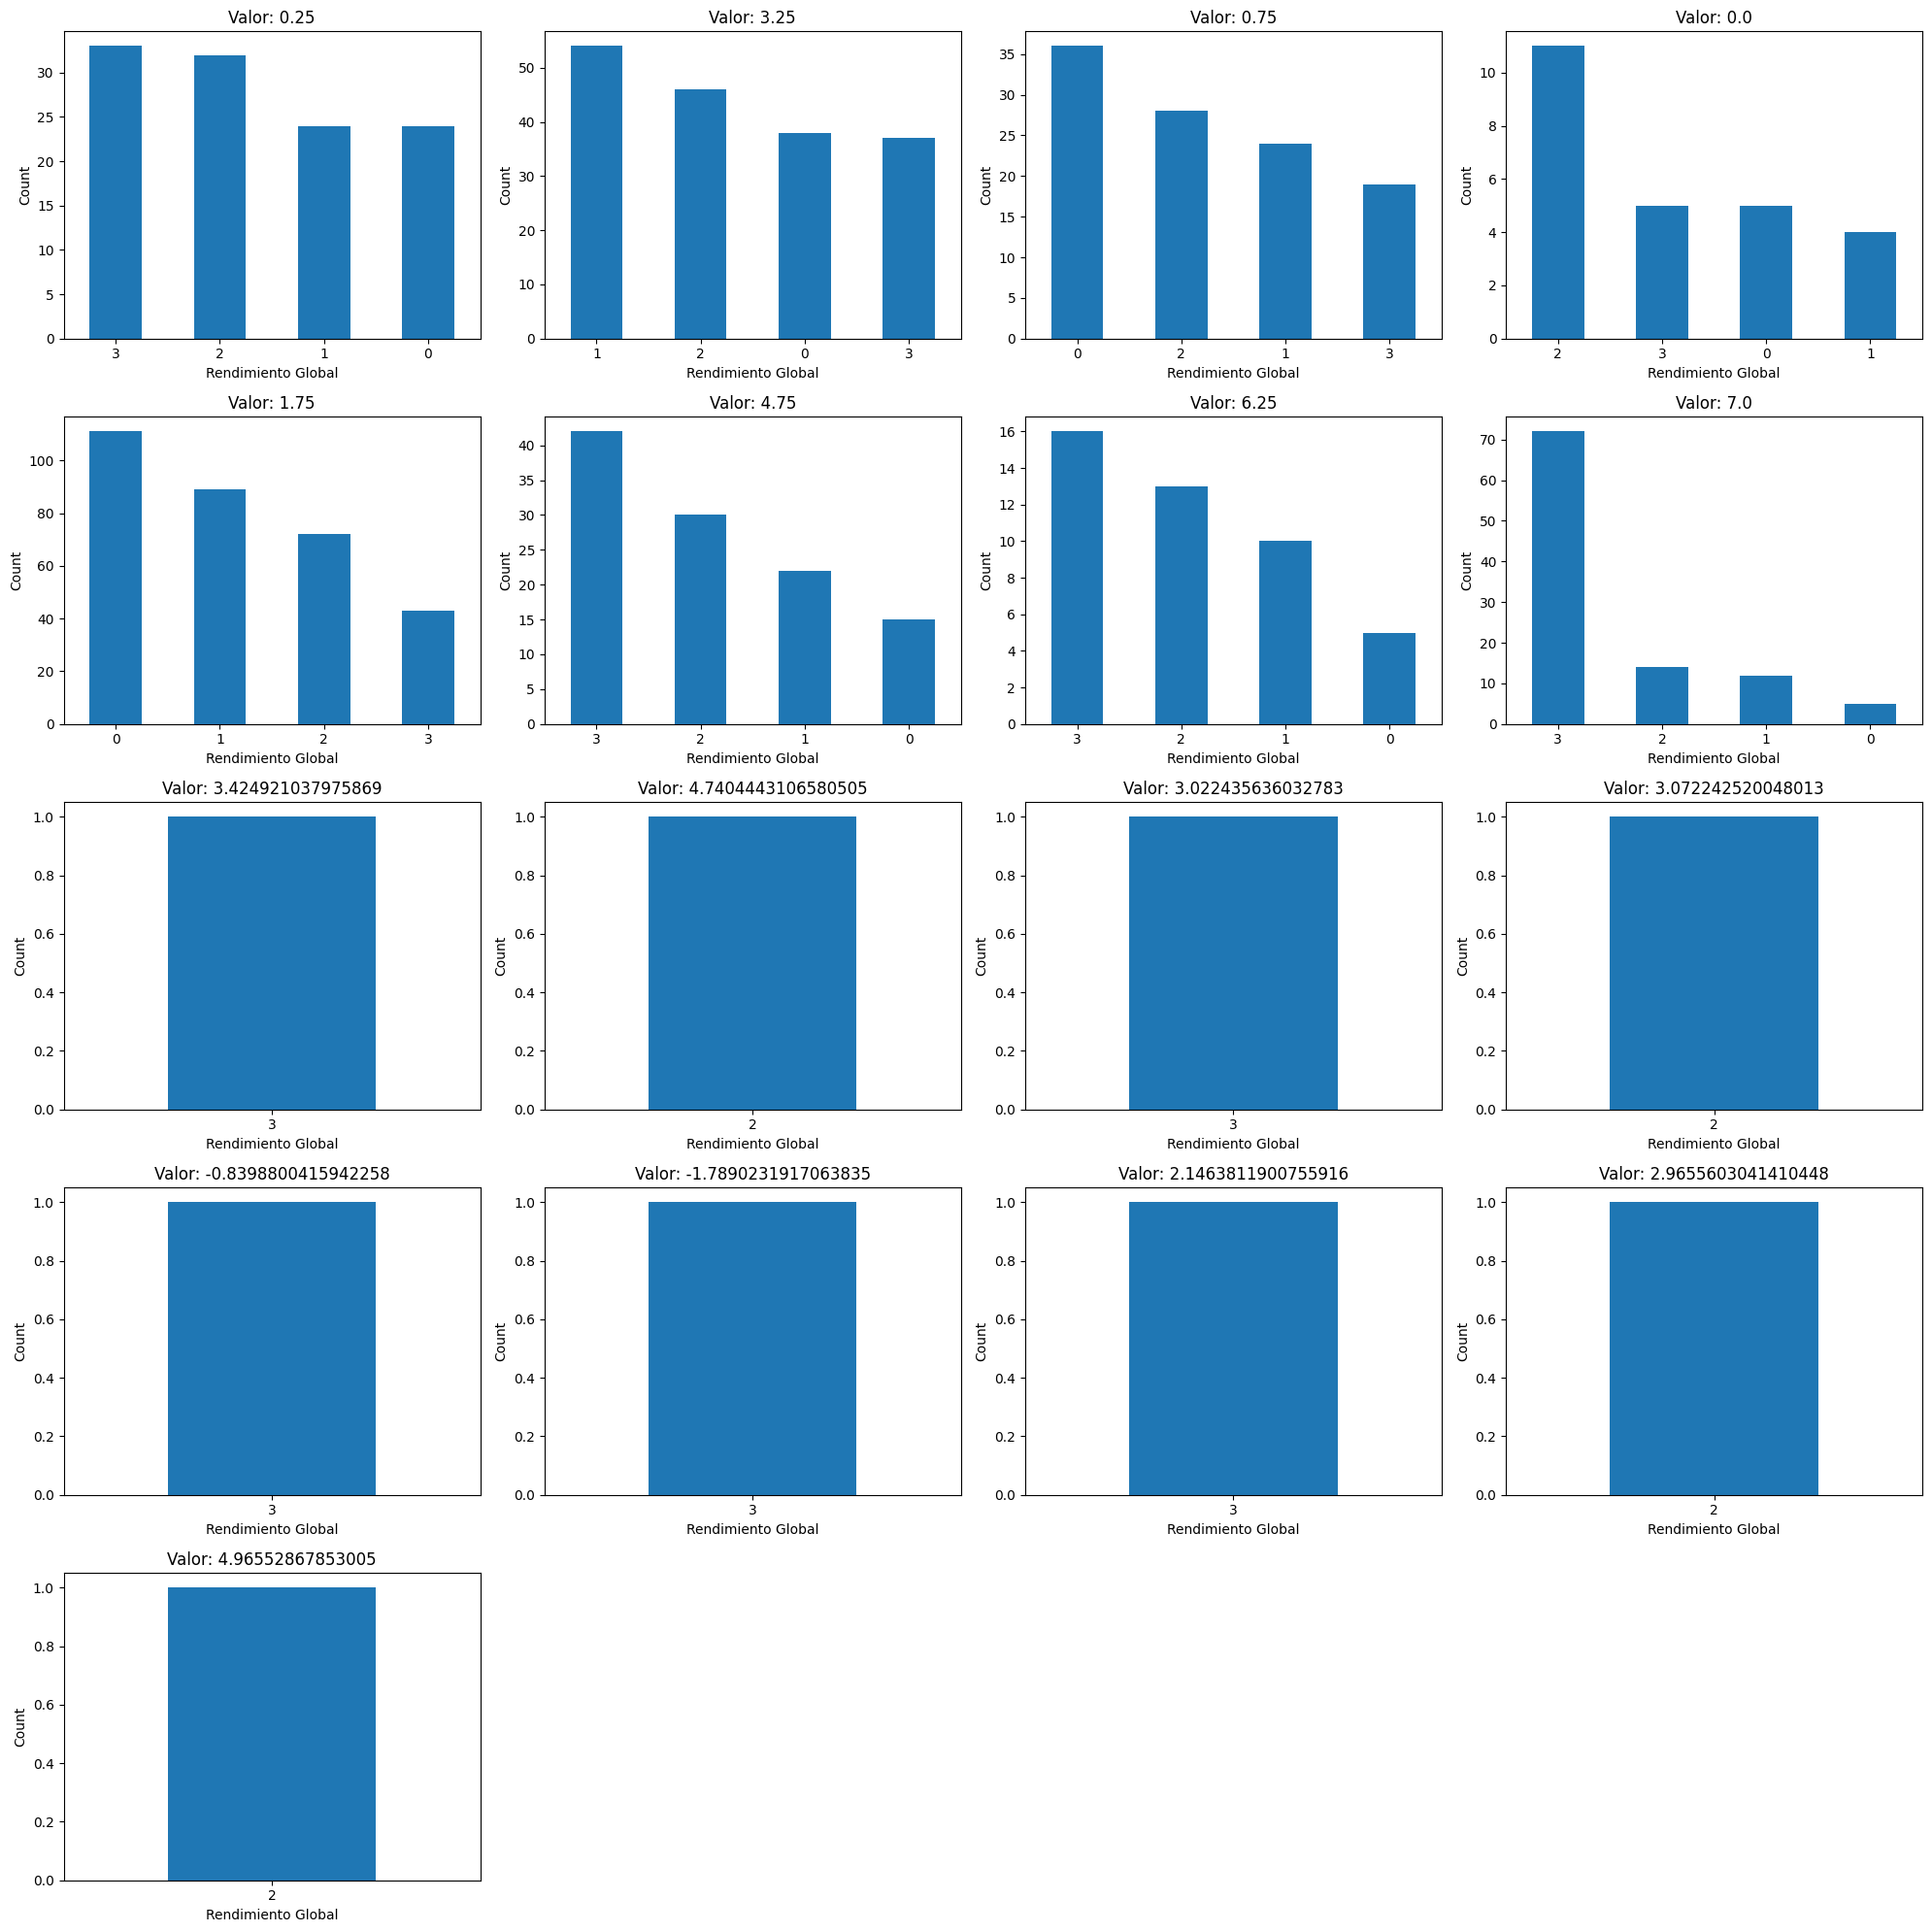

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample the data
sample_size = 1000  # Adjust this number as needed
sampled_data = data.sample(n=sample_size, random_state=1)

# Get unique values for the column of interest
unique_valores = sampled_data['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

# Set up the number of columns for the subplot
n_cols = 4
n_rows = (len(unique_valores) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over axes

for ax, valor in zip(axes, unique_valores):
    # Filter the sampled data for the current value
    filtered_data = sampled_data[sampled_data['ESTU_VALORMATRICULAUNIVERSIDAD'] == valor]

    # Plot the counts of RENDIMIENTO_GLOBAL
    rendimiento_counts = filtered_data['RENDIMIENTO_GLOBAL'].value_counts()
    rendimiento_counts.plot(kind='bar', ax=ax)

    ax.set_title(f'Valor: {valor}')
    ax.set_xlabel('Rendimiento Global')
    ax.set_ylabel('Count')
    ax.set_xticklabels(rendimiento_counts.index, rotation=0)

# Hide any remaining empty subplots
for i in range(len(unique_valores), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## PERIODO X RENDIMIENTO_GLOBAL

<ipython-input-39-244586912f8b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rendimiento, x='PERIODO', y='RENDIMIENTO_GLOBAL', palette='viridis')


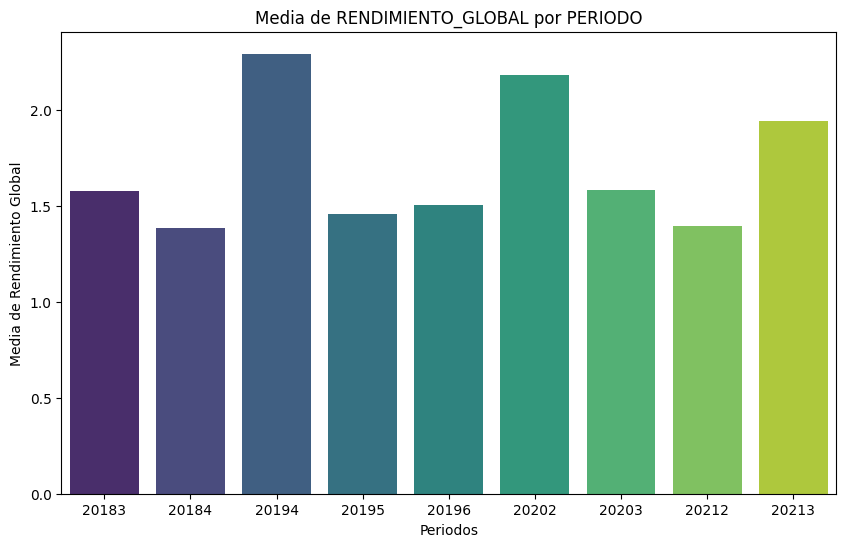

In [ ]:
import seaborn as sns
# Calcular la media de RENDIMIENTO_GLOBAL por estrato
mean_rendimiento = data.groupby('PERIODO')['RENDIMIENTO_GLOBAL'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_rendimiento, x='PERIODO', y='RENDIMIENTO_GLOBAL', palette='viridis')

# Etiquetas y título
plt.xlabel("Periodos")
plt.ylabel("Media de Rendimiento Global")
plt.title("Media de RENDIMIENTO_GLOBAL por PERIODO")
plt.show()

## Programa acádemico X Rendimiento Global

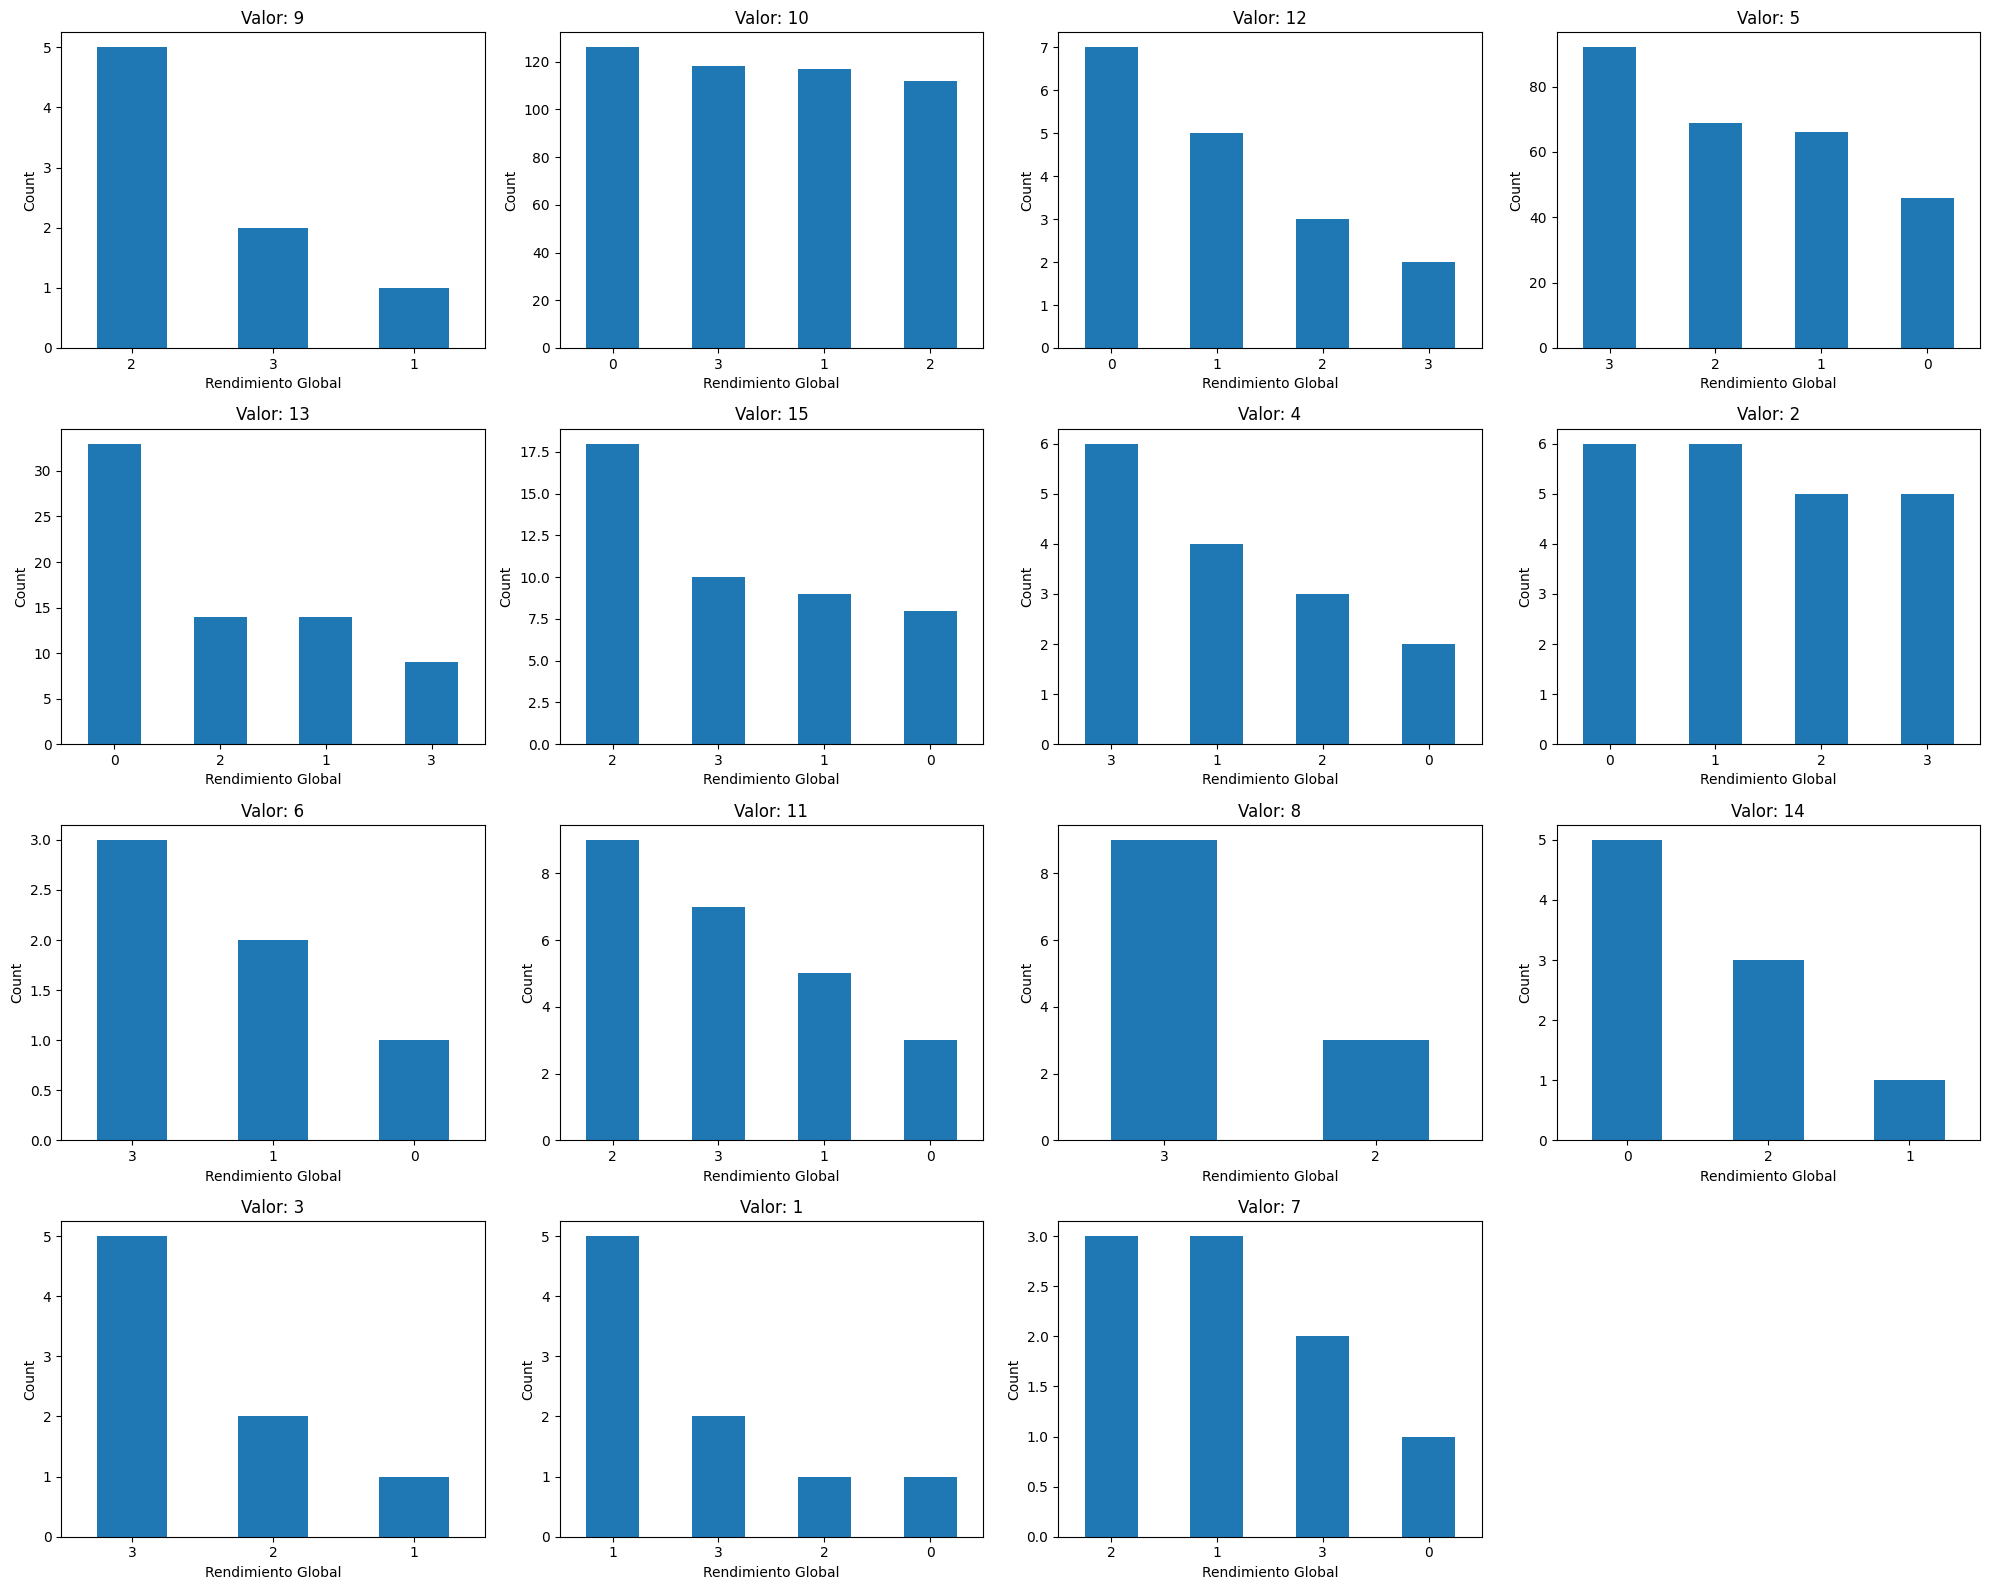

In [ ]:
# Sample the data
sample_size = 1000  # Adjust this number as needed
sampled_data = data.sample(n=sample_size, random_state=1)

# Get unique values for the column of interest
unique_valores = sampled_data['ESTU_PRGM_ACADEMICO'].unique()

# Set up the number of columns for the subplot
n_cols = 4
n_rows = (len(unique_valores) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over axes

for ax, valor in zip(axes, unique_valores):
    # Filter the sampled data for the current value
    filtered_data = sampled_data[sampled_data['ESTU_PRGM_ACADEMICO'] == valor]

    # Plot the counts of RENDIMIENTO_GLOBAL
    rendimiento_counts = filtered_data['RENDIMIENTO_GLOBAL'].value_counts()
    rendimiento_counts.plot(kind='bar', ax=ax)

    ax.set_title(f'Valor: {valor}')
    ax.set_xlabel('Rendimiento Global')
    ax.set_ylabel('Count')
    ax.set_xticklabels(rendimiento_counts.index, rotation=0)

# Hide any remaining empty subplots
for i in range(len(unique_valores), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## ESTU_PRGM_DEPARTAMENTO X RENDIMIENTO_GLOBAL

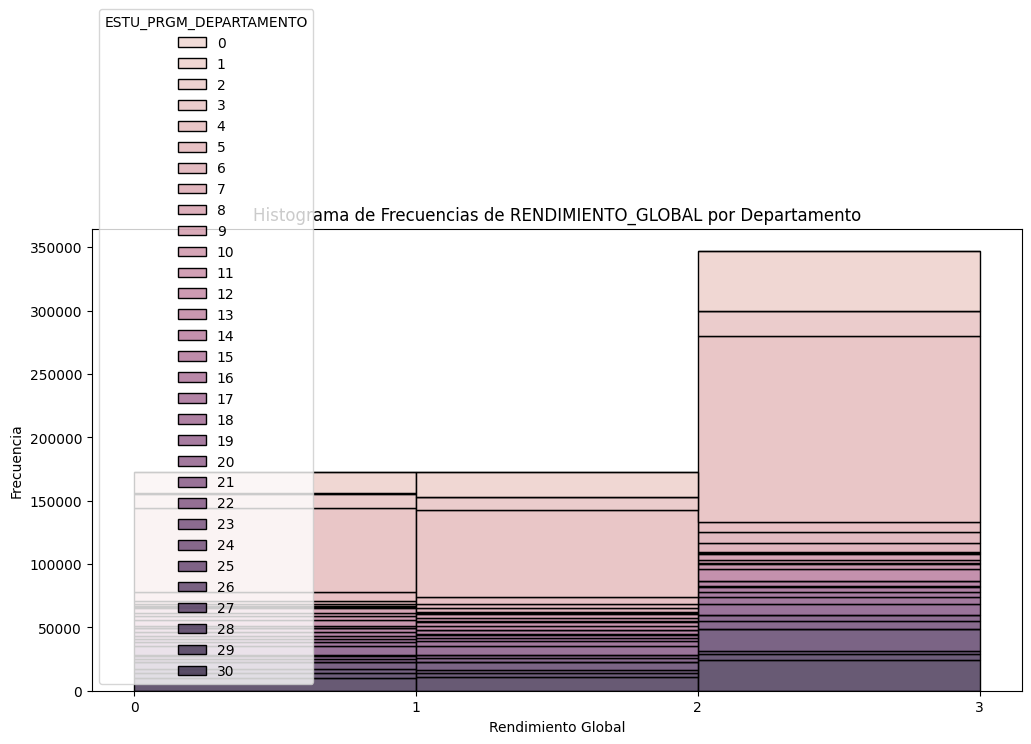

In [ ]:
import seaborn as sns
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear histograma de frecuencias usando seaborn
sns.histplot(
    data=data,
    x='RENDIMIENTO_GLOBAL',
    hue='ESTU_PRGM_DEPARTAMENTO',
    multiple='stack',  # 'stack' para histogramas apilados, 'dodge' para histogramas agrupados
    binwidth=1
)

# Etiquetas y título
plt.xlabel("Rendimiento Global")
plt.ylabel("Frecuencia")
plt.title("Histograma de Frecuencias de RENDIMIENTO_GLOBAL por Departamento")
plt.xticks([0, 1, 2, 3])  # Valores específicos de RENDIMIENTO_GLOBAL

# Mostrar gráfico
plt.show()

## ESTU_HORASSEMANATRABAJA X RENDIMIENTO_GLOBAL

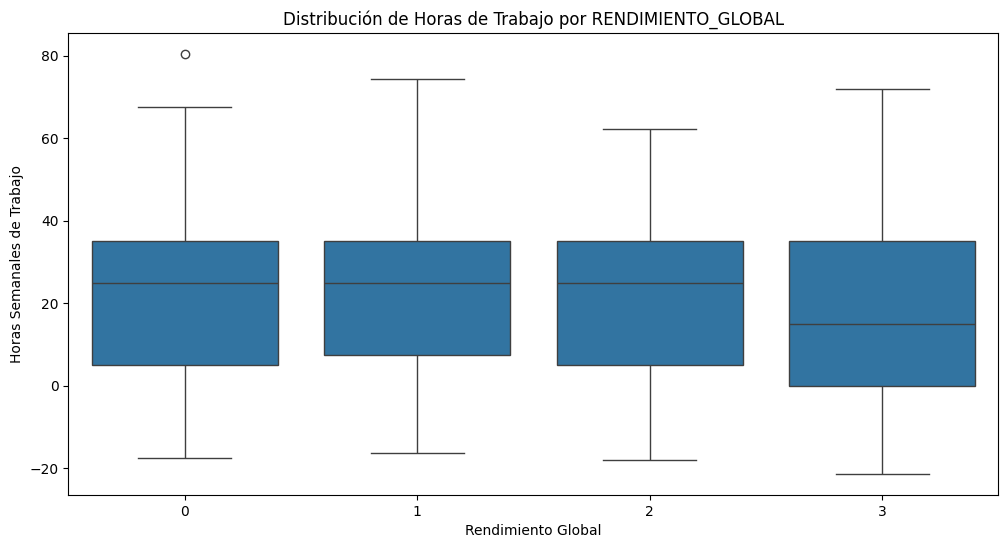

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear un box plot para comparar las horas de trabajo con rendimiento global
sns.boxplot(
    data=data,
    x='RENDIMIENTO_GLOBAL',
    y='ESTU_HORASSEMANATRABAJA'
)

# Etiquetas y título
plt.xlabel("Rendimiento Global")
plt.ylabel("Horas Semanales de Trabajo")
plt.title("Distribución de Horas de Trabajo por RENDIMIENTO_GLOBAL")

# Mostrar gráfico
plt.show()

## FAMI_ESTRATOVIVIENDA X RENDIMIENTO_GLOBAL

<ipython-input-43-860bafc8d11e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rendimiento, x='FAMI_ESTRATOVIVIENDA', y='RENDIMIENTO_GLOBAL', palette='viridis')


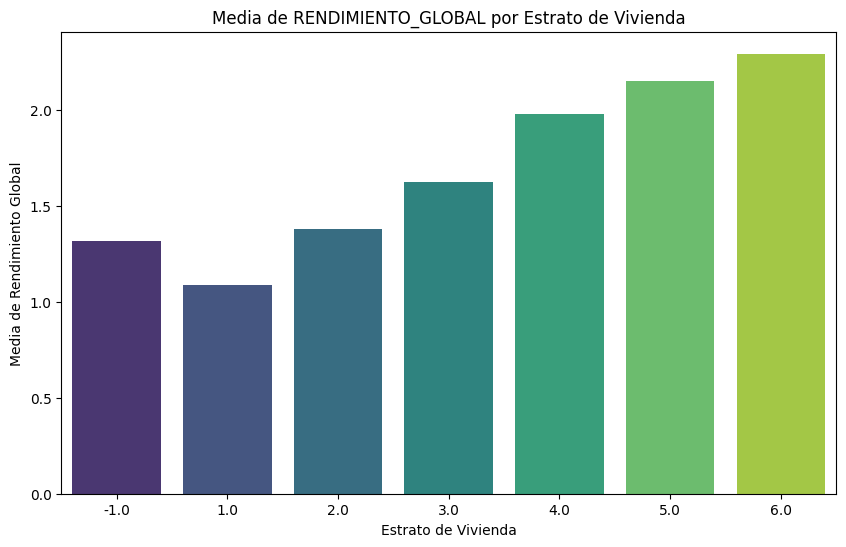

In [ ]:
# Calcular la media de RENDIMIENTO_GLOBAL por estrato
mean_rendimiento = data.groupby('FAMI_ESTRATOVIVIENDA')['RENDIMIENTO_GLOBAL'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_rendimiento, x='FAMI_ESTRATOVIVIENDA', y='RENDIMIENTO_GLOBAL', palette='viridis')

# Etiquetas y título
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Media de Rendimiento Global")
plt.title("Media de RENDIMIENTO_GLOBAL por Estrato de Vivienda")
plt.show()

In [ ]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,Categoria_5,BOGOTÁ,6.25,5.0,Estrato 3,1,5,9,No,2
1,645256,20212,Categoria_5,ATLANTICO,3.25,0.0,Estrato 3,0,6,5,No,0
2,308367,20203,Categoria_12,BOGOTÁ,3.25,35.0,Estrato 3,1,4,4,No,0
3,470353,20195,Categoria_13,SANTANDER,4.75,0.0,Estrato 4,1,-1,4,No,3
4,989032,20212,Categoria_5,ANTIOQUIA,3.25,25.0,Estrato 3,1,2,2,No,1


## FAMI_TIENEINTERNET X RENDIMIENTO_GLOBAL

<ipython-input-44-200774904ec8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rendimiento, x='FAMI_TIENEINTERNET', y='RENDIMIENTO_GLOBAL', palette='viridis')


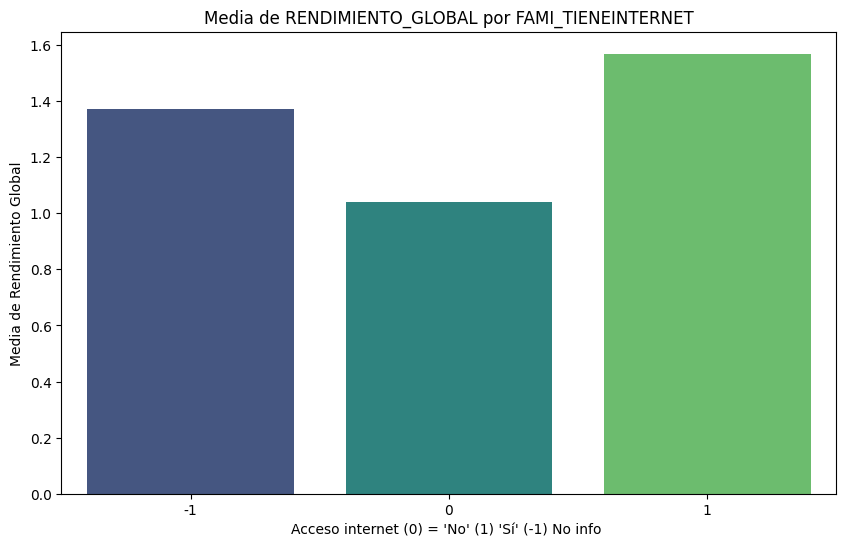

In [ ]:
# Calcular la media de RENDIMIENTO_GLOBAL por estrato
mean_rendimiento = data.groupby('FAMI_TIENEINTERNET')['RENDIMIENTO_GLOBAL'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_rendimiento, x='FAMI_TIENEINTERNET', y='RENDIMIENTO_GLOBAL', palette='viridis')

# Etiquetas y título
plt.xlabel("Acceso internet (0) = 'No' (1) 'Sí' (-1) No info ")
plt.ylabel("Media de Rendimiento Global")
plt.title("Media de RENDIMIENTO_GLOBAL por FAMI_TIENEINTERNET")
plt.show()

## FAMI_EDUCACIONPADRE X RENDIMIENTO_GLOBAL

<ipython-input-45-ef9eaff638dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rendimiento, x='FAMI_EDUCACIONPADRE', y='RENDIMIENTO_GLOBAL', palette='viridis')


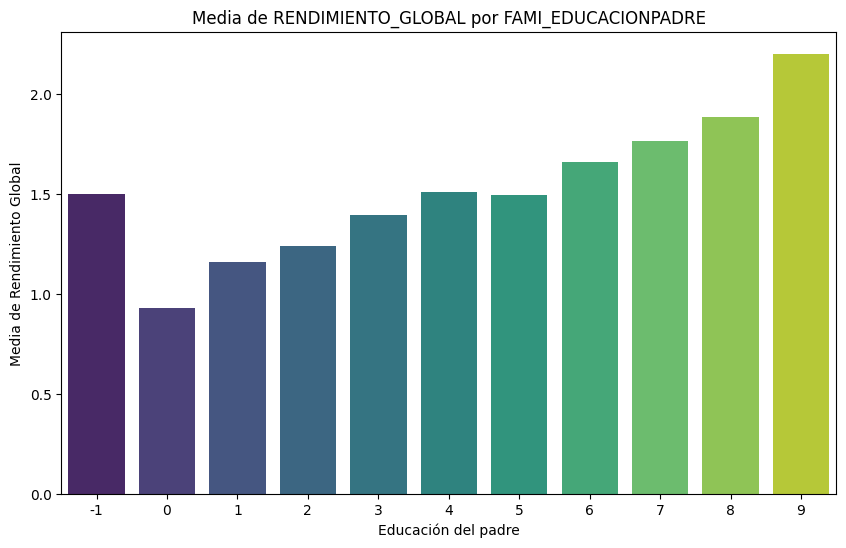

In [ ]:
# Calcular la media de RENDIMIENTO_GLOBAL por estrato
mean_rendimiento = data.groupby('FAMI_EDUCACIONPADRE')['RENDIMIENTO_GLOBAL'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_rendimiento, x='FAMI_EDUCACIONPADRE', y='RENDIMIENTO_GLOBAL', palette='viridis')

# Etiquetas y título
plt.xlabel("Educación del padre")
plt.ylabel("Media de Rendimiento Global")
plt.title("Media de RENDIMIENTO_GLOBAL por FAMI_EDUCACIONPADRE")
plt.show()

## FAMI_EDUCACIONMADRE X RENDIMIENTO_GLOBAL

<ipython-input-38-5f04a32c001a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rendimiento, x='FAMI_EDUCACIONMADRE', y='RENDIMIENTO_GLOBAL', palette='viridis')


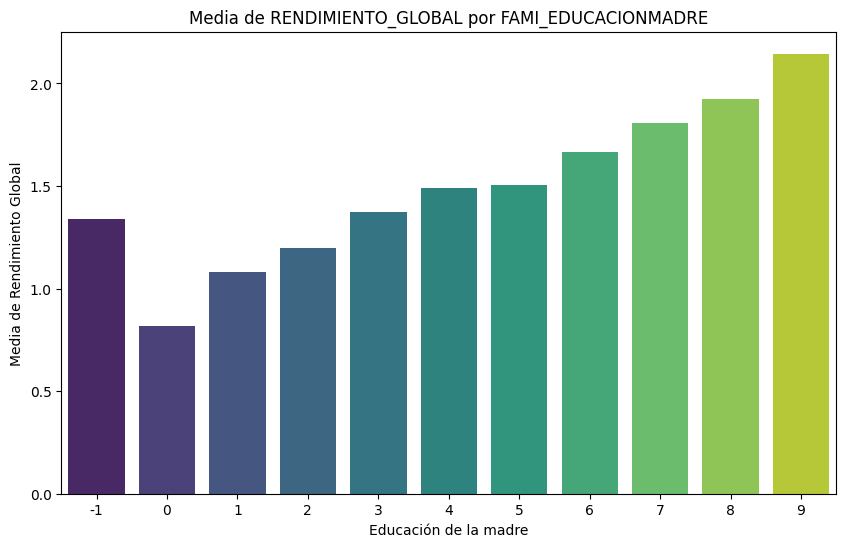

In [ ]:
# Calcular la media de RENDIMIENTO_GLOBAL por estrato
mean_rendimiento = data.groupby('FAMI_EDUCACIONMADRE')['RENDIMIENTO_GLOBAL'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_rendimiento, x='FAMI_EDUCACIONMADRE', y='RENDIMIENTO_GLOBAL', palette='viridis')

# Etiquetas y título
plt.xlabel("Educación de la madre")
plt.ylabel("Media de Rendimiento Global")
plt.title("Media de RENDIMIENTO_GLOBAL por FAMI_EDUCACIONMADRE")
plt.show()

## ESTU_PAGOMATRICULAPROPIO X RENDIMIENTO_GLOBAL

<ipython-input-40-673fda0edaf3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rendimiento, x='ESTU_PAGOMATRICULAPROPIO', y='RENDIMIENTO_GLOBAL', palette='viridis')


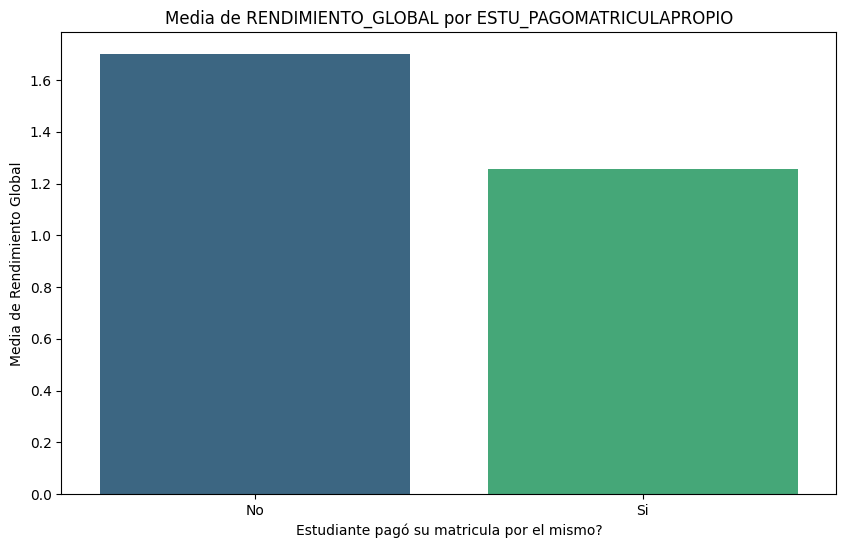

In [ ]:
# Calcular la media de RENDIMIENTO_GLOBAL por estrato
mean_rendimiento = data.groupby('ESTU_PAGOMATRICULAPROPIO')['RENDIMIENTO_GLOBAL'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_rendimiento, x='ESTU_PAGOMATRICULAPROPIO', y='RENDIMIENTO_GLOBAL', palette='viridis')

# Etiquetas y título
plt.xlabel("Estudiante pagó su matricula por el mismo?")
plt.ylabel("Media de Rendimiento Global")
plt.title("Media de RENDIMIENTO_GLOBAL por ESTU_PAGOMATRICULAPROPIO")
plt.show()

# Análisis y exclusion de las variables


De momento vemos que gráficamente las variables contribuyen y tienen una distribución que puede ser importante en las predicciones por lo que las dejaremos intactas. Después planeamos realizar pruebas eliminando columnas para ver si los resultados mejoran o no.

In [28]:
data.drop(columns=['ID'], inplace=True)
# data.drop(columns=['Categoria'], inplace=True)
data.head()


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,20212,5,4,6.25,5.0,3.0,1,5,9,0,2
1,20212,5,3,3.25,0.0,3.0,0,6,5,0,0
2,20203,1,4,3.25,35.0,3.0,1,4,4,0,0
3,20195,10,26,4.75,0.0,4.0,1,-1,4,0,3
4,20212,5,1,3.25,25.0,3.0,1,2,2,0,1


In [29]:
data.shape

(692500, 11)

# Modelo

Primero declaramos la columna de interés

In [49]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
# z[y_col] = [rmap[i] for i in z[y_col]]
# z.head()

## Construimos X y Y para el modelo de entrenamiento


In [31]:
data = data[sorted(data.columns)] #Las ordenamos

X = data[[c for c in data.columns if c!=y_col]].values # En x vamos a tomar los que no son la columna de interés
y = data[y_col].values # En y vamos a tomar la columna de interés
X.shape, y.shape # Tamaño de X y Y

((692500, 10), (692500,))

## Ahora vamos a dividir el modelo en la fase de entrenamiento y testeo

Este paso es escencial porque así vamos a poder entrenar el modelo con el dataset y probar la precisión con un dataset que el modelo en si no ha interactuado nunca

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 10), (138500, 10), (554000,), (138500,))

estamos tomando el 80% de los datos del dataset para realizar el entrenamiento

##Red Neuronal con MLPClassifier:

In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(Xtr, ytr)

HistGradientBoostingClassifier()

In [63]:
preds_tr = hgb_model.predict(Xtr)
preds_ts = hgb_model.predict(Xts)
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.4286949458483755, 0.42175451263537905)

## Loading and cleaning the test.csv file


In [51]:
zt = pd.read_csv("test.csv")
zt.drop(columns=['Unnamed: 0'], inplace=True)
zt

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [52]:
zt.shape

(296786, 11)

In [53]:
zt_ids = zt['ID'].values
zt.drop(columns=['ID'], inplace=True)
zt.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No


Cleaning functions

In [54]:
cleaning_val_matricula(zt)
cleaning_internet(zt)
cleaning_padre(zt)
cleaning_madre(zt)
cleaning_programa(zt)
cleaning_horas(zt)
department_cleaning(zt)
cleaning_estrato(zt)
cleaning_pagomatriculapropio(zt)
zt.head()

False
False
False
False


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


False
['Menos de 10 horas' 'Entre 21 y 30 horas' '0' 'Entre 11 y 20 horas'
 'Más de 30 horas' nan]


<ipython-input-20-5cc7fc740a4d>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ESTU_HORASSEMANATRABAJA'] = data['ESTU_HORASSEMANATRABAJA'].replace(rango_a_horas)


[ 5.         25.          0.         ... 45.49248999  5.15253575
 28.98764963]
False
False
False
[ 1  0 -1]


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,20183,11,5,0.25,5.0,3.0,1,6,2,1
1,20203,15,1,3.25,25.0,2.0,1,4,6,0
2,20212,10,4,1.75,0.0,3.0,1,3,4,0
3,20195,14,27,1.75,25.0,1.0,0,1,1,0
4,20212,10,3,3.25,15.0,2.0,1,4,4,0


Creamos el array X para predecir con base en zt

In [55]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 10)

Invocación del modelo

In [56]:
preds_test_data = hgb_model.predict(X_test_data)

## Subir predicciones a kaggle

In [57]:
# inverse mapping
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [58]:
# create dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [59]:
# save to file ready to submit
submission.to_csv("my_submission.csv", index=False)

In [60]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [61]:
submission.shape

(296786, 2)

In [62]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "Miguel Serna submission with random forest model"

100% 4.03M/4.03M [00:00<00:00, 16.8MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia